#  Setup

In [0]:
!mkdir -p ~/.kaggle
!echo '{"username":"aksonsam","key":"5878bc124e8992538e03c7d4f5258cd5"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d danofer/dbpedia-classes

 97% 159M/164M [00:02<00:00, 101MB/s] 
100% 164M/164M [00:02<00:00, 83.0MB/s]


In [0]:
!unzip db*.zip

Archive:  dbpedia-classes.zip
  inflating: DBPEDIA_test.csv        
  inflating: DBPEDIA_val.csv         
  inflating: DBPEDIA_train.csv       
  inflating: DBP_wiki_data.csv       


In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2019-10-26 08:19:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-10-26 08:19:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-10-26 08:19:38--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
from functools import wraps
from time import time

def time_wraps(f):
  """A Decorator function to get the time."""
  @wraps(f)
  def wrapper(*args, **kwargs):
    start = time()
    result = f(*args, **kwargs)
    endtime = time()
    print('Elapsed time : {} secs '.format(round((endtime-start), 4)))
    return result
  return wrapper

In [0]:
@time_wraps # - this is a decorator
def read_glove(file_name):
  """A Function to read the glove vectors from file."""
  with open(file_name,'r') as f:
    word_vocab = set() # not using list to avoid duplicate entry
    word2vector = {}
    for line in f:
      line_ = line.strip() #Remove leading and trailing white spaces
      words_Vec = line_.split() #splits the string into list
      word_vocab.add(words_Vec[0]) #Formation of string
      word2vector[words_Vec[0]] = np.array(words_Vec[1:],dtype=float) #formation of array
      pdb.set_trace()
  print("Total Words in DataSet:",len(word_vocab))
  return word_vocab,word2vector

NameError: ignored

In [0]:
import pandas as pd
import numpy as np

In [0]:
word_vocab, w2v = read_glove('glove.6B.50d.txt')

> <ipython-input-7-266f4598896d>(7)read_glove()
-> for line in f:
(Pdb) word_vocab
{'the'}
(Pdb) type(word_vocab)
<class 'set'>
(Pdb) type(line)
<class 'str'>
(Pdb) line
'the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581\n'


In [0]:
df = pd.read_csv('DBP_wiki_data.csv')
df.head()

,text,l1,l2,l3,wiki_name,word_count
0,The 1994 Mindoro earthquake occurred on Novemb...,Event,NaturalEvent,Earthquake,1994_Mindoro_earthquake,59
1,The 1917 Bali earthquake occurred at 06:50 loc...,Event,NaturalEvent,Earthquake,1917_Bali_earthquake,68
2,The 1941 Colima earthquake occurred on April 1...,Event,NaturalEvent,Earthquake,1941_Colima_earthquake,194
3,The 1983 Coalinga earthquake occurred on May 2...,Event,NaturalEvent,Earthquake,1983_Coalinga_earthquake,98
4,The 2013 Bushehr earthquake occurred with a mo...,Event,NaturalEvent,Earthquake,2013_Bushehr_earthquake,61


In [0]:
import matplotlib.pyplot as plt

In [0]:
!pip install -q swifter
import swifter

     |████████████████████████████████| 61kB 9.1MB/s 


# EDA 1

In [0]:
@time_wraps
def plot_bar(x, y, plt_title):
  """A Function to plot the bar graph."""
  fig, ax = plt.subplots(figsize=(35, 7))
  ax.bar(x, y)
  ax.tick_params('x', rotation=90)
  ax.set_title(plt_title)
  fig.tight_layout()
  plt.show()

In [0]:
# counting the class in dataset
l3_value_counts = df.l3.value_counts()
l3_value_counts.head()

Manga              2700
Planet             2700
GolfPlayer         2700
AcademicJournal    2700
FootballMatch      2700
Name: l3, dtype: int64

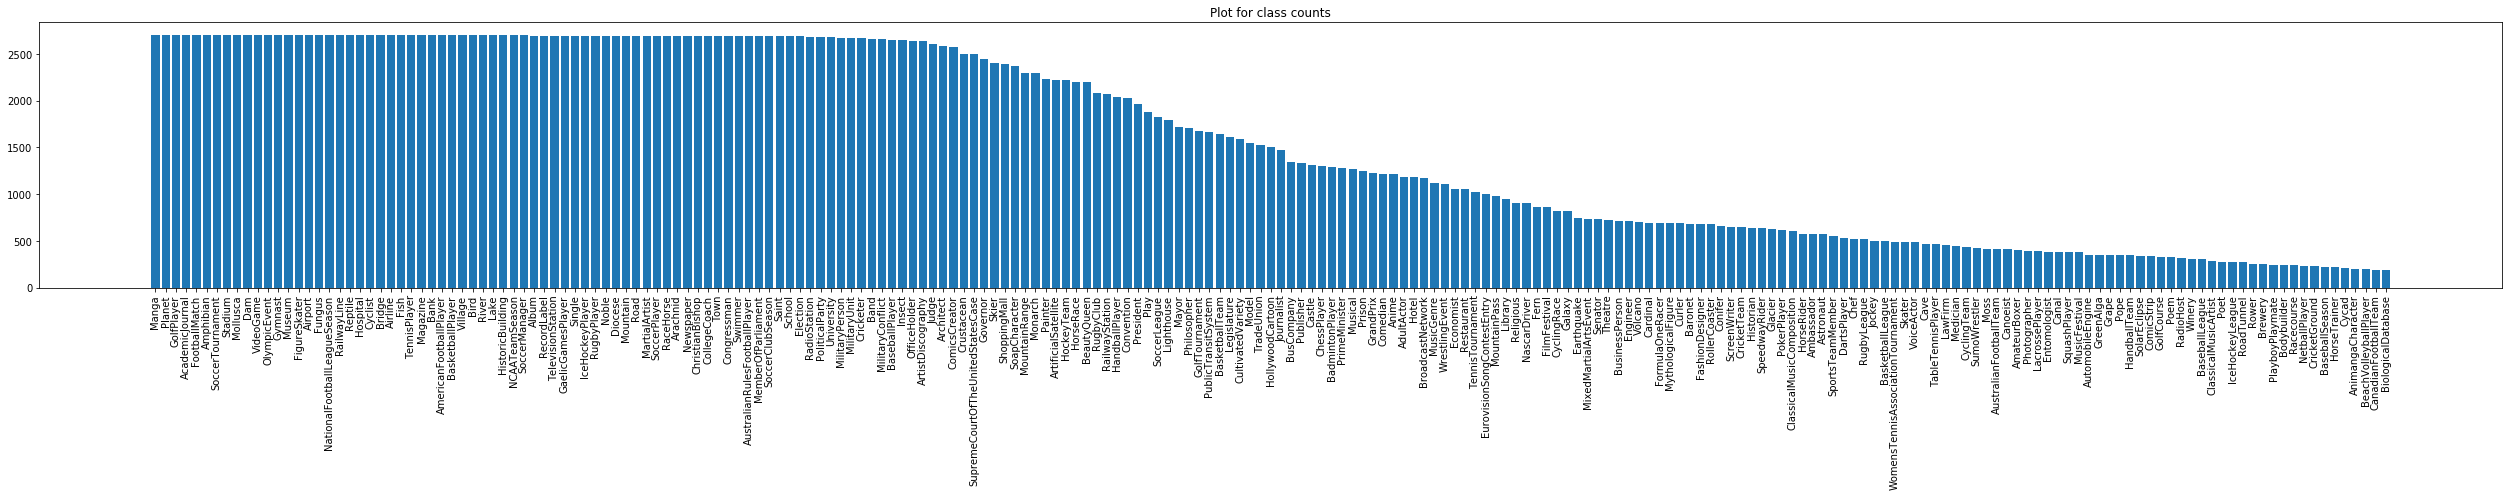

Elapsed time : 4.9745 secs 


In [0]:
plot_bar(l3_value_counts.index.to_list(), l3_value_counts.to_list(), 'Plot for class counts')

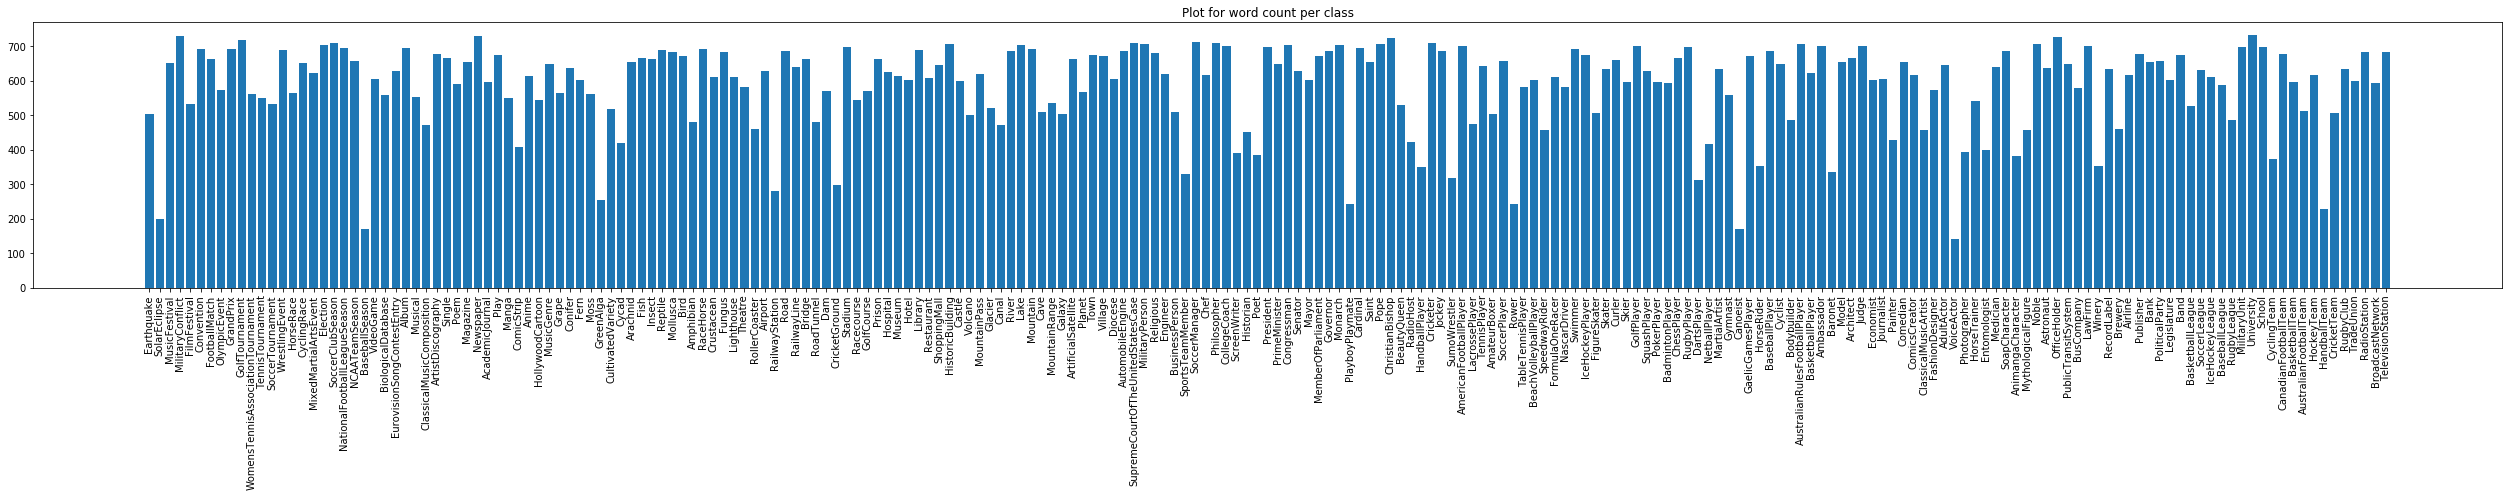

Elapsed time : 1961.2262 secs 


In [0]:
# plotting word_count per class
plot_bar(df.l3.to_list(), df.word_count.to_list(), 'Plot for word count per class')

In [0]:
df.shape

(342781, 6)

In [0]:
def cal_label_perc(x):
  """A function to calculate the label percentage in the dataset."""
  return (l3_value_counts.loc[x] / df.shape[0]) * 100

In [0]:
df['perc_label'] = df.l3.apply(cal_label_perc) #added a column of calculated label percentage to df

In [0]:
df.head()

,text,l1,l2,l3,wiki_name,word_count,perc_label
0,The 1994 Mindoro earthquake occurred on Novemb...,Event,NaturalEvent,Earthquake,1994_Mindoro_earthquake,59,0.217632
1,The 1917 Bali earthquake occurred at 06:50 loc...,Event,NaturalEvent,Earthquake,1917_Bali_earthquake,68,0.217632
2,The 1941 Colima earthquake occurred on April 1...,Event,NaturalEvent,Earthquake,1941_Colima_earthquake,194,0.217632
3,The 1983 Coalinga earthquake occurred on May 2...,Event,NaturalEvent,Earthquake,1983_Coalinga_earthquake,98,0.217632
4,The 2013 Bushehr earthquake occurred with a mo...,Event,NaturalEvent,Earthquake,2013_Bushehr_earthquake,61,0.217632


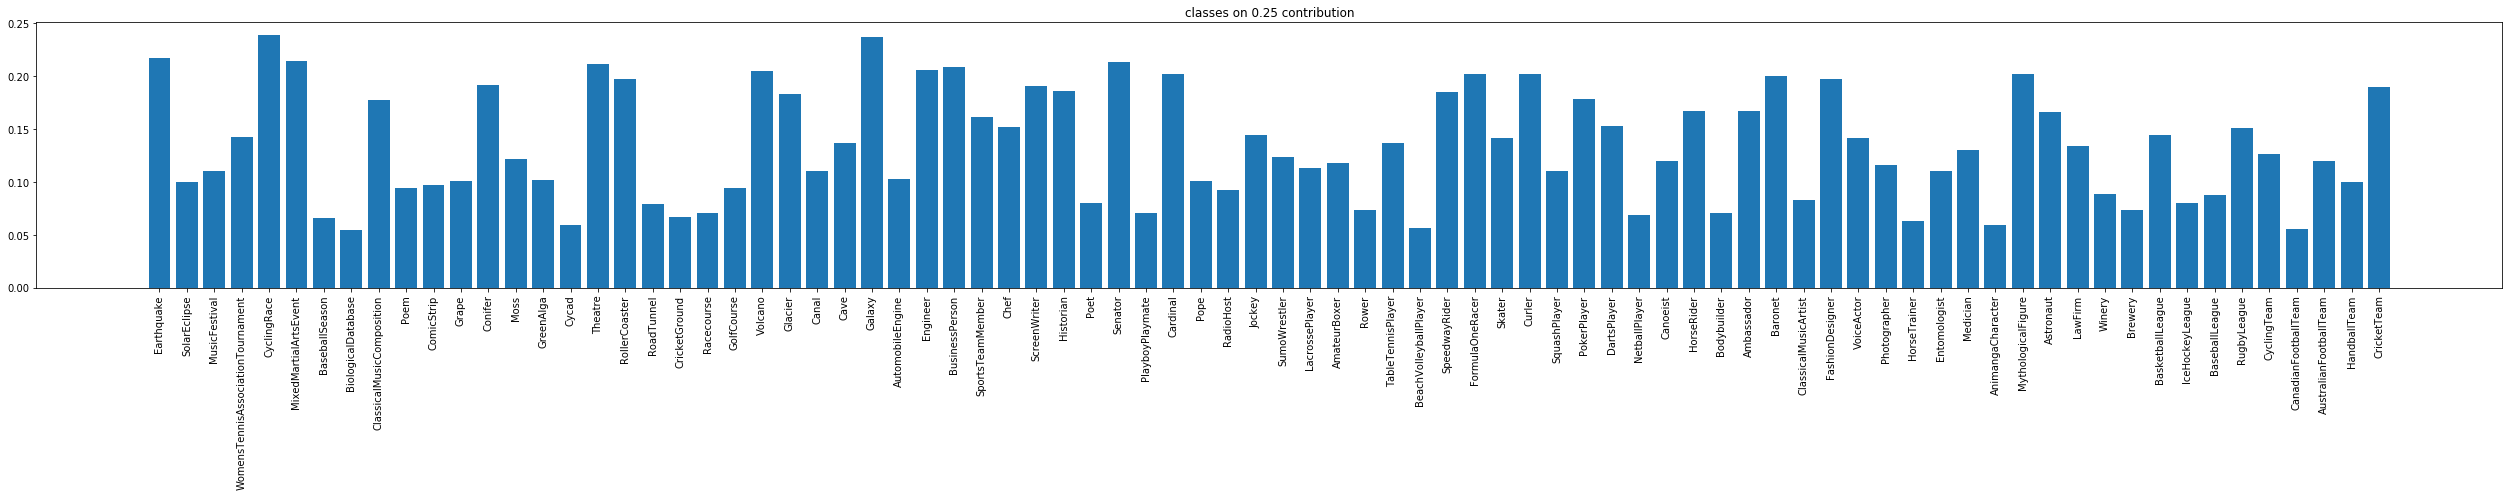

Elapsed time : 113.4932 secs 
CricketTeam--IceHockeyLeague--Cardinal--Canoeist--RoadTunnel--VoiceActor--ComicStrip--BaseballSeason--SumoWrestler--Rower--Moss--FormulaOneRacer--GreenAlga--BusinessPerson--NetballPlayer--HorseTrainer--SportsTeamMember--BaseballLeague--RugbyLeague--AutomobileEngine--Earthquake--PlayboyPlaymate--RadioHost--MixedMartialArtsEvent--Chef--HorseRider--Baronet--BasketballLeague--CyclingTeam--Poet--ScreenWriter--DartsPlayer--Brewery--AmateurBoxer--HandballTeam--SpeedwayRider--Skater--AnimangaCharacter--ClassicalMusicComposition--Bodybuilder--AustralianFootballTeam--Photographer--Cycad--Astronaut--Cave--Galaxy--Volcano--CricketGround--Theatre--PokerPlayer--MythologicalFigure--RollerCoaster--LawFirm--MusicFestival--WomensTennisAssociationTournament--BiologicalDatabase--ClassicalMusicArtist--Winery--LacrossePlayer--Engineer--Grape--Pope--Ambassador--Entomologist--Medician--Curler--Glacier--Conifer--Canal--Historian--Jockey--Poem--Senator--BeachVolleyballPlayer--GolfC

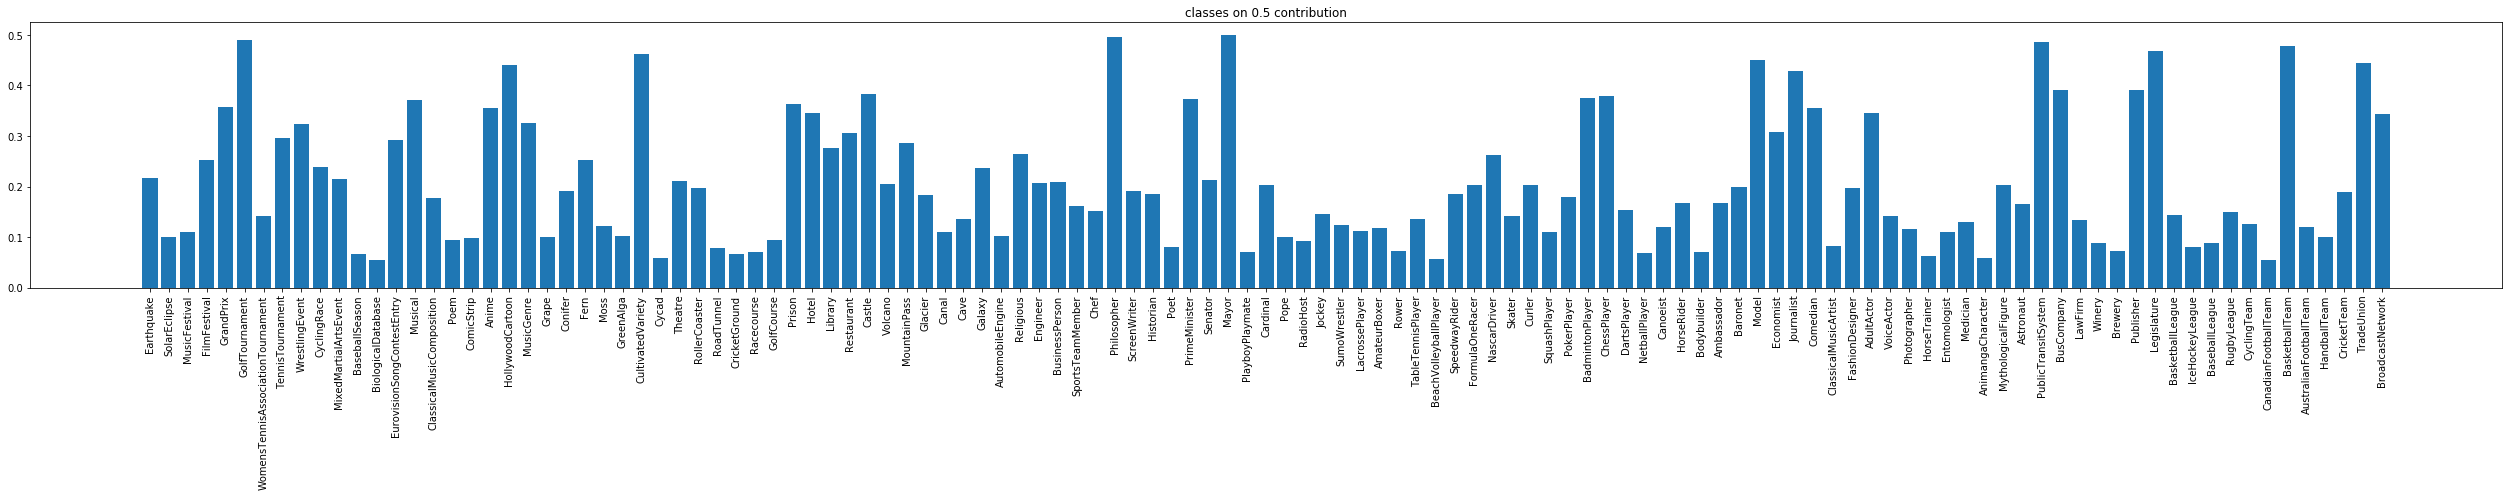

Elapsed time : 283.8103 secs 
CricketTeam--VoiceActor--ComicStrip--BasketballTeam--PublicTransitSystem--RugbyLeague--AutomobileEngine--Baronet--MountainPass--BasketballLeague--Poet--ScreenWriter--Skater--Bodybuilder--AustralianFootballTeam--Photographer--Theatre--MythologicalFigure--Anime--WomensTennisAssociationTournament--LacrossePlayer--PrimeMinister--Pope--Economist--Canal--Historian--GolfCourse--SquashPlayer--CanadianFootballTeam--Canoeist--BaseballSeason--SumoWrestler--Rower--HorseTrainer--NetballPlayer--Castle--TradeUnion--Philosopher--BadmintonPlayer--Brewery--ClassicalMusicComposition--AdultActor--Volcano--RollerCoaster--MusicFestival--Grape--Comedian--MusicGenre--Senator--BeachVolleyballPlayer--Musical--GrandPrix--SolarEclipse--NascarDriver--ChessPlayer--Moss--Publisher--BusinessPerson--SportsTeamMember--RadioHost--MixedMartialArtsEvent--GolfTournament--AnimangaCharacter--Mayor--Hotel--BiologicalDatabase--ClassicalMusicArtist--Winery--Ambassador--Religious--Entomologist--Wres

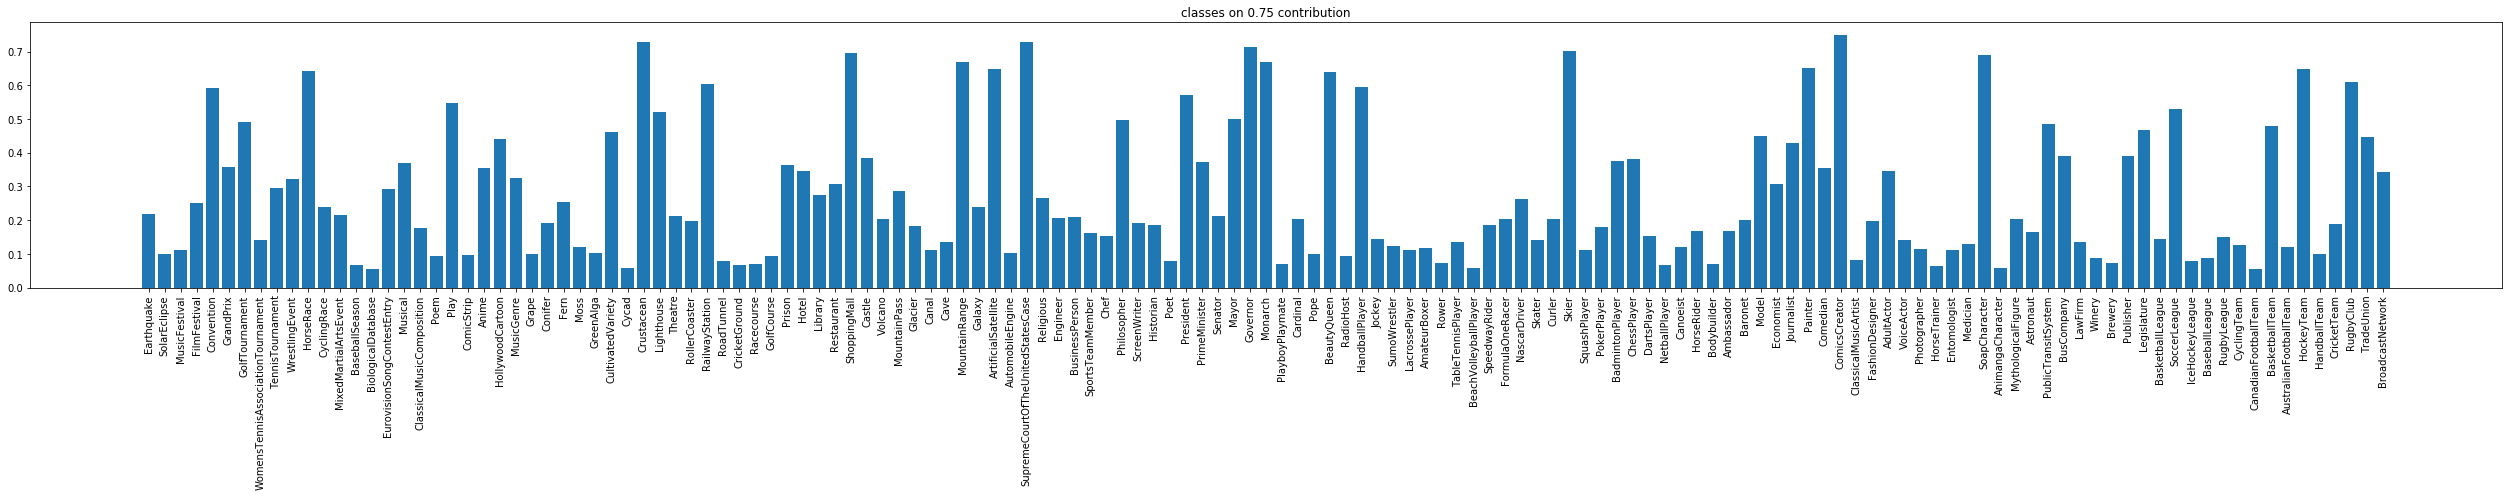

Elapsed time : 492.6041 secs 
ComicsCreator--CricketTeam--VoiceActor--ComicStrip--BasketballTeam--PublicTransitSystem--HockeyTeam--RugbyLeague--AutomobileEngine--Baronet--MountainPass--BasketballLeague--Poet--ScreenWriter--RailwayStation--Skater--Bodybuilder--AustralianFootballTeam--Photographer--Theatre--MythologicalFigure--Anime--SupremeCourtOfTheUnitedStatesCase--WomensTennisAssociationTournament--LacrossePlayer--PrimeMinister--Pope--Economist--ShoppingMall--Canal--Historian--Governor--GolfCourse--SquashPlayer--CanadianFootballTeam--Canoeist--BaseballSeason--SumoWrestler--Rower--HorseTrainer--NetballPlayer--Castle--TradeUnion--Philosopher--BadmintonPlayer--Brewery--ClassicalMusicComposition--AdultActor--Volcano--RollerCoaster--MusicFestival--Grape--Comedian--MusicGenre--Senator--BeachVolleyballPlayer--Musical--Crustacean--GrandPrix--SolarEclipse--NascarDriver--RugbyClub--ChessPlayer--Moss--Publisher--BusinessPerson--SportsTeamMember--RadioHost--MixedMartialArtsEvent--GolfTournament-

In [0]:
for i in range(1, 4):
  new_df = df[df['perc_label'] < (i * 0.25)]
  plot_bar(new_df.l3.to_list(), new_df.perc_label.to_list(), 'classes on {} contribution'.format((i * 0.25)))
  print('--'.join(list(set(new_df.l3.tolist()))))
  del new_df

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df = df.dropna(axis=0)

In [0]:
df.head()

,text,l1,l2,l3,wiki_name,word_count,perc_label
0,The 1994 Mindoro earthquake occurred on Novemb...,Event,NaturalEvent,Earthquake,1994_Mindoro_earthquake,59,0.217632
1,The 1917 Bali earthquake occurred at 06:50 loc...,Event,NaturalEvent,Earthquake,1917_Bali_earthquake,68,0.217632
2,The 1941 Colima earthquake occurred on April 1...,Event,NaturalEvent,Earthquake,1941_Colima_earthquake,194,0.217632
3,The 1983 Coalinga earthquake occurred on May 2...,Event,NaturalEvent,Earthquake,1983_Coalinga_earthquake,98,0.217632
4,The 2013 Bushehr earthquake occurred with a mo...,Event,NaturalEvent,Earthquake,2013_Bushehr_earthquake,61,0.217632


In [0]:
df.shape

(342781, 7)

In [0]:
train_data, test_data = train_test_split(df, stratify=df.l3, test_size=0.1, shuffle=True, random_state=42)
train_data.shape, test_data.shape

((308502, 7), (34279, 7))

In [0]:
class_diction = dict((v, i) for i, v in enumerate(list(set(df.l3.to_list())))) #DOUBT
rev_class_diction = dict((i, v) for i, v in zip(class_diction.values(), class_diction.keys()))
len(class_diction)

219

In [0]:
# change the class function
def class_fn(x):
  """A Function to convert from the class label to number."""
  return class_diction[x]

In [0]:
train_data.l3 = train_data.l3.apply(class_fn)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
train_data.head()

,text,l1,l2,l3,wiki_name,word_count,perc_label
84005,"Lividoconus is a subgenus of sea snails, marin...",Species,Animal,172,Lividoconus,68,0.787383
273976,Michel Chossudovsky (born 1946) is a Canadian ...,Agent,Person,130,Michel_Chossudovsky,72,0.306901
150089,NGC 164 is a galaxy located in the constellati...,Place,CelestialBody,73,NGC_164,23,0.237469
291359,"Thomas Courtenay, 5th/13th Earl of Devon (1414...",Agent,Person,128,"Thomas_de_Courtenay,_5th/13th_Earl_of_Devon",255,0.785633
58126,Six Degrees of Separation is a play written by...,Work,WrittenWork,21,Six_Degrees_of_Separation_(play),191,0.546705


**SVC EXP 1** 

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import collections

In [0]:
class TfidfEmbeddingVectorizer(object):
  def __init__(self, word2vec):
    self.word2vec = word2vec
    self.word2weight = None
    self.dim = 50
  
  def fit(self, X, y):
    tfidf = TfidfVectorizer(analyzer=lambda x : x)
    tfidf.fit(X)
    
    max_idf = max(tfidf.idf_)
    self.word2weight = collections.defaultdict(
        lambda: max_idf,
        [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()]
    )
    return self
  
  def transform(self, X):
    tmp = np.array([
                     [self.word2vec[w] * self.word2weight[w]
                      for w in X if w in self.word2vec] or
                     [np.zeros(self.dim)] for words in X
    ])
    tmp = np.reshape(tmp, (tmp.shape[0], -1))
    return tmp

In [0]:
svc_pipeline = Pipeline([
                         ('word2vec_tfidf', TfidfEmbeddingVectorizer(w2v)),
                         ('svc_clf', SVC(degree=9, kernel='rbf', gamma='scale', probability=True, random_state=42, verbose=True, class_weight='balanced'))
], verbose=True)

In [0]:
epochs = 3

for epoch in range(epochs):
  print('epoch - {}'.format(epoch))
  idx = train_data.sample(n=50000, random_state=42).index
  svc_pipeline.fit(train_data.text.loc[idx], train_data.l3.loc[idx])

epoch - 0
[Pipeline] .... (step 1 of 2) Processing word2vec_tfidf, total= 9.2min
[LibSVM][Pipeline] ........... (step 2 of 2) Processing svc_clf, total=40.3min
epoch - 1
[Pipeline] .... (step 1 of 2) Processing word2vec_tfidf, total= 9.1min
[LibSVM][Pipeline] ........... (step 2 of 2) Processing svc_clf, total=41.2min
epoch - 2
[Pipeline] .... (step 1 of 2) Processing word2vec_tfidf, total= 9.4min
[LibSVM][Pipeline] ........... (step 2 of 2) Processing svc_clf, total=41.2min


In [0]:
from sklearn.metrics import classification_report

In [0]:
# testing the predictions
tmp_idx = test_data.sample(n=50, random_state=42).index
tmp_pred = svc_pipeline.predict_proba(test_data.text.loc[tmp_idx])
tmp_pred

array([[0.00240304, 0.00103843, 0.00546684, ..., 0.00611671, 0.00040931,
        0.00810305],
       [0.00240304, 0.00103843, 0.00546684, ..., 0.00611671, 0.00040931,
        0.00810305],
       [0.00240304, 0.00103843, 0.00546684, ..., 0.00611671, 0.00040931,
        0.00810305],
       ...,
       [0.00240304, 0.00103843, 0.00546684, ..., 0.00611671, 0.00040931,
        0.00810305],
       [0.00240304, 0.00103843, 0.00546684, ..., 0.00611671, 0.00040931,
        0.00810305],
       [0.00240304, 0.00103843, 0.00546684, ..., 0.00611671, 0.00040931,
        0.00810305]])

In [0]:
tmp_pred = [np.argmax(i) for i in tmp_pred]
tmp_pred[:10]

[19, 19, 19, 19, 19, 19, 19, 19, 19, 19]

In [0]:
y_true = test_data.l3.loc[tmp_idx].apply(class_fn)

In [0]:
print(classification_report(y_true.to_list(), tmp_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       2.0
          15       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       0.0
          20       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       1.0
          27       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       2.0
          39       0.00      0.00      0.00       1.0
          40       0.00      0.00      0.00       3.0
          44       0.00      0.00      0.00       1.0
          45       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       1.0
          51       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       1.0
          53       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# EDA 2

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import string
import re
import spacy
from spacy.en import English()

In [0]:
STOP_LIST = set(stopwords.words('english') + ["n't", "'s", "'m", "ca"] + list(ENGLISH_STOP_WORDS))

SYMBOLS = " ".join(string.punctuation).split(" ") + ["-----", "----",  "...", "“", "”", "'ve"]

In [0]:
# tokenizing using spacy
def spacy_tokenize(text):
  """A Functiont to tokenize the text."""
  
  # break into tokens
  tokens = parser(text)
  
  # lemmatize
  lemmas = [tok.lemma_.lower().strip() for tok in tokens if tok.lemma_ != "-PRON-" else tok.lower_]
  tokens = lemmas
  
  # remove stop words
  tokens = [tok for tok in tokens if tok not in STOPLIST]
  
  return tokens

# function to clean the text
def clean_text(text):
  """A Function to clean the bloody text!!"""
  
  # removing spaces and newlines
  text = text.strip().replace("\n", " the text
  spacy_tokens = spacy_tokenize(text)
  
  # replace chinese symbols
  stupid_chinese_symbols = re.findall(ur'[\u4e00-\u9fff]+', text)
  text = " ".join([w for w in spacy_tokens if w not in stupid_chinese_symbols])
  
  # replace html symbols
  text = text.replace("&amp;", "and").replace("&gt;", ">").replace("&lt;", "<" )
  
  # lower the case
  text = text.lower()
  return text

# features with highest coefficient values
def print_highest_coeff(vectorizer, clf, N):
  pass

# custom transformer for cleaning text with spacy
class CleanTextTransformer(TransformerMixin):
  """Clean the bloody text!!"""
  
  def transform(self, X, **transform_params):
    return [clean_text(text) for text in X]
  
  def fit(self, X, y=None, **fit_params):
    return self
  
  def get_params(self, deep=True):
    return {}

In [0]:
# create a vectorizer
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1, 1))

In [0]:
# create the classifier
clf = SVC(probability=True, gamma='scale')

In [0]:
# create a pipeline
pipe = Pipeline([
    ('clean_text', CleanTextTransformer()),
    ('vectorizer', vectorizer),
    ('clf', clf)
])

In [0]:
# fit the model on train data
pipe.fit(train_data.text.to_list(), train_data.l3.to_list())

In [0]:
# get the vectorizer in getting the feature names

vocab = vectorizer.get_feature_names()

# display the transformed vectors
pipe = Pipeline([
    ('clean_text', CleantTextTransformer()),
    ('vectorizer', vectorizer)
])

transform = pipe.fit_transform(train_data.text.to_list(), train_data.l3.to_list())

for i in range(len(train_data)):
  s = ""
  idx_to_vocab = transform.indices[transform.indptr[i] : transform.indptr[i + 1]]
  num_occurences = transform.data[transform.indptr[i] : transform.indptr[i + 1]]
  for idx, num in zip(idx_to_vocab, num_occurences):
    s += str((vocab[idx], num))
  print("Sample {}:{}".format(i, s))


# EDA 3

In [0]:
# remove the sentences with word count less than 5
def word_count_based_removal(df, n):
  """A function to remove the sentences as per the given word count."""
  return df.loc[df[df.word_count > n].index]

# get max min avg of the word count
def get_max_min_avg(df):
  """A Function to get the max min from df."""
  return max(df.word_count), min(df.word_count), np.average(df.word_count)

# Given text count the words
def count_words(text):
  """A function to count the words in the text."""
  return len(text.split())

# remove words as per frequency of the words
def freq_based_removal(df, m, n):
  """A Function to remove as per the frequency."""
  freq = pd.Series(' '.join(df.text).split()).value_counts()
  high_freq = freq[freq > m].index
  low_freq = freq[freq < n].index
  df.text = df.text.swifter.apply(lambda x: ' '.join(x for x in x.split() if x not in high_freq))
  df.text = df.text.swifter.apply(lambda x: ' '.join(x for x in x.split() if x not in low_freq))
  df.word_count = df.text.swifter.apply(count_words)
  return df